# Portfolio Optimization using Deep Reinforcement Learning
----

## 2.0 Download the Data for the Analysis
---
* Data is Downloaded from niftyfiftyindices.com
* The NIFTY 50 tickers for the period from 20018 to 2024 are used
* The data is downloaded and the cleaned data are saved in csv files for use

---


### 2.1 Import Relevant Packages

In [259]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-req-build-r72v8iu9
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-req-build-r72v8iu9
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit ccf56f5e7f6760da87998622148a502b92be962a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-qfwqpak_/elegantrl_73d816759aa64e76bd11dd663b717866
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-qfwqpak_/elegantrl_73d816759aa64e76bd11dd663b717866
  Resolved https://github.com/AI4Finance

In [260]:
import pandas as pd
import numpy as np
from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

### 2.2 Create Folders

In [261]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

### 2.3 Download the NIFTY 50 Stocks

In [262]:
pip install niftystocks

Note: you may need to restart the kernel to use updated packages.


In [263]:
from niftystocks import ns

In [264]:
import pandas as pd

url = "/Users/kshama/Documents/Capstone Options/Capstone-Indian data/MW-NIFTY-50-18-Apr-2024.csv"

# Download and read the CSV file
data = pd.read_csv(url)


In [265]:
data.head()


,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE \n (₹ Crores),52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 18-Apr-2023
0,NIFTY 50,"22,212.35","22,295.55","22,153.80","22,147.90","22,275.80",127.90,0.58,"16,76,82,489","14,901.27","22,775.70","17,553.95",0.42,25.41
1,POWERGRID,287.90,289.90,277.70,274.25,284.30,10.05,3.66,"2,53,88,211",719.37,298.90,171.49,3.53,19.08
2,BPCL,604.50,617.60,601.05,592.30,609.85,17.55,2.96,"63,77,691",389.83,687.95,330.30,1.72,76.91
3,BHARTIARTL,"1,220.00","1,251.00","1,215.80","1,216.45","1,248.70",32.25,2.65,"53,88,787",662.63,"1,251.00",752.55,-0.72,60.11
4,HINDALCO,616.40,623.25,612.45,608.85,623.00,14.15,2.32,"31,29,079",193.34,625.40,397.80,14.63,41.08


In [266]:
nifty_50_tickers = data["SYMBOL \n"].tolist()


In [267]:
print(nifty_50_tickers)

['NIFTY 50', 'POWERGRID', 'BPCL', 'BHARTIARTL', 'HINDALCO', 'GRASIM', 'M&M', 'ADANIPORTS', 'HDFCLIFE', 'LT', 'TATASTEEL', 'TCS', 'LTIM', 'EICHERMOT', 'TATACONSUM', 'SHRIRAMFIN', 'SBILIFE', 'BAJAJ-AUTO', 'JSWSTEEL', 'DRREDDY', 'KOTAKBANK', 'INFY', 'ASIANPAINT', 'ADANIENT', 'INDUSINDBK', 'WIPRO', 'RELIANCE', 'COALINDIA', 'CIPLA', 'BAJAJFINSV', 'SBIN', 'HINDUNILVR', 'ULTRACEMCO', 'NTPC', 'TATAMOTORS', 'TECHM', 'HDFCBANK', 'ICICIBANK', 'SUNPHARMA', 'MARUTI', 'BRITANNIA', 'TITAN', 'DIVISLAB', 'HEROMOTOCO', 'ONGC', 'ITC', 'BAJFINANCE', 'HCLTECH', 'AXISBANK', 'APOLLOHOSP', 'NESTLEIND']


In [268]:
ticker_list=nifty_50_tickers

In [269]:
print(ticker_list)

['NIFTY 50', 'POWERGRID', 'BPCL', 'BHARTIARTL', 'HINDALCO', 'GRASIM', 'M&M', 'ADANIPORTS', 'HDFCLIFE', 'LT', 'TATASTEEL', 'TCS', 'LTIM', 'EICHERMOT', 'TATACONSUM', 'SHRIRAMFIN', 'SBILIFE', 'BAJAJ-AUTO', 'JSWSTEEL', 'DRREDDY', 'KOTAKBANK', 'INFY', 'ASIANPAINT', 'ADANIENT', 'INDUSINDBK', 'WIPRO', 'RELIANCE', 'COALINDIA', 'CIPLA', 'BAJAJFINSV', 'SBIN', 'HINDUNILVR', 'ULTRACEMCO', 'NTPC', 'TATAMOTORS', 'TECHM', 'HDFCBANK', 'ICICIBANK', 'SUNPHARMA', 'MARUTI', 'BRITANNIA', 'TITAN', 'DIVISLAB', 'HEROMOTOCO', 'ONGC', 'ITC', 'BAJFINANCE', 'HCLTECH', 'AXISBANK', 'APOLLOHOSP', 'NESTLEIND']


In [270]:
pip install finrl

  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-gm7y7796/elegantrl_9516109544c041cfbc0b90c53b5b009a
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-gm7y7796/elegantrl_9516109544c041cfbc0b90c53b5b009a
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit b64df20f552477f24ec50c3e5088c1e241fdc455
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [271]:
from config import config

In [272]:
#ticker_list = config.NIFTY_50_TICKER

In [273]:
ticker_list = ['POWERGRID', 'BPCL', 'BHARTIARTL', 'HINDALCO', 'GRASIM', 'M&M', 'ADANIPORTS', 'HDFCLIFE', 'LT', 'TATASTEEL', 'TCS', 'LTIM', 'EICHERMOT', 'TATACONSUM', 'SHRIRAMFIN', 'SBILIFE', 'BAJAJ-AUTO', 'JSWSTEEL', 'DRREDDY', 'KOTAKBANK', 'INFY', 'ASIANPAINT', 'ADANIENT', 'INDUSINDBK', 'WIPRO', 'RELIANCE', 'COALINDIA', 'CIPLA', 'BAJAJFINSV', 'SBIN', 'HINDUNILVR', 'ULTRACEMCO', 'NTPC', 'TATAMOTORS', 'TECHM', 'HDFCBANK', 'ICICIBANK', 'SUNPHARMA', 'MARUTI', 'BRITANNIA', 'TITAN', 'DIVISLAB', 'HEROMOTOCO', 'ONGC', 'ITC', 'BAJFINANCE', 'HCLTECH', 'AXISBANK', 'APOLLOHOSP', 'NESTLEIND']

# Add ".NS" to each ticker using list comprehension
ticker_list = [ticker + ".NS" for ticker in ticker_list]

print(ticker_list)


['POWERGRID.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'HINDALCO.NS', 'GRASIM.NS', 'M&M.NS', 'ADANIPORTS.NS', 'HDFCLIFE.NS', 'LT.NS', 'TATASTEEL.NS', 'TCS.NS', 'LTIM.NS', 'EICHERMOT.NS', 'TATACONSUM.NS', 'SHRIRAMFIN.NS', 'SBILIFE.NS', 'BAJAJ-AUTO.NS', 'JSWSTEEL.NS', 'DRREDDY.NS', 'KOTAKBANK.NS', 'INFY.NS', 'ASIANPAINT.NS', 'ADANIENT.NS', 'INDUSINDBK.NS', 'WIPRO.NS', 'RELIANCE.NS', 'COALINDIA.NS', 'CIPLA.NS', 'BAJAJFINSV.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'ULTRACEMCO.NS', 'NTPC.NS', 'TATAMOTORS.NS', 'TECHM.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'SUNPHARMA.NS', 'MARUTI.NS', 'BRITANNIA.NS', 'TITAN.NS', 'DIVISLAB.NS', 'HEROMOTOCO.NS', 'ONGC.NS', 'ITC.NS', 'BAJFINANCE.NS', 'HCLTECH.NS', 'AXISBANK.NS', 'APOLLOHOSP.NS', 'NESTLEIND.NS']


In [274]:
pip install --upgrade pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [275]:
import yfinance as yf
import pandas as pd
import config  # Make sure you have config.py in your project directory

start_date = '2018-01-01'
end_date = '2024-02-28'



combined_df = pd.DataFrame()  # Initialize an empty DataFrame

for ticker in ticker_list:
    df = yf.download(ticker, start=start_date, end=end_date)
    df['Symbols'] = ticker  # Add a column for the ticker symbol
    df.reset_index(inplace=True)  # Reset index
    df = df[['Date', 'Symbols', 'Adj Close', 'High', 'Low', 'Close', 'Open', 'Volume']]  # Reorder columns
    combined_df = pd.concat([combined_df, df])

combined_df.reset_index(drop=True, inplace=True)  # Reset index for better organization
print(combined_df.head())  # Print first few rows of the combined DataFrame



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

        Date       Symbols  Adj Close        High         Low       Close  \
0 2018-01-01  POWERGRID.NS  79.861046  113.484406  111.965652  112.612526   
1 2018-01-02  POWERGRID.NS  80.080437  113.512527  112.106277  112.921906   
2 2018-01-03  POWERGRID.NS  80.439468  113.878151  112.837524  113.428154   
3 2018-01-04  POWERGRID.NS  79.920876  114.103149  112.500031  112.696899   
4 2018-01-05  POWERGRID.NS  80.279900  113.653152  112.837524  113.203156   

         Open   Volume  
0  111.965652  6388017  
1  113.203156  4383705  
2  113.343781  8187397  
3  113.625031  4204055  
4  113.231277  4923559  


In [276]:
print(type(combined_df))

<class 'pandas.core.frame.DataFrame'>


In [277]:
df = combined_df.copy()

In [278]:
df.shape

(76050, 8)

In [279]:
df.head()

,Date,Symbols,Adj Close,High,Low,Close,Open,Volume
0,2018-01-01,POWERGRID.NS,79.861046,113.484406,111.965652,112.612526,111.965652,6388017
1,2018-01-02,POWERGRID.NS,80.080437,113.512527,112.106277,112.921906,113.203156,4383705
2,2018-01-03,POWERGRID.NS,80.439468,113.878151,112.837524,113.428154,113.343781,8187397
3,2018-01-04,POWERGRID.NS,79.920876,114.103149,112.500031,112.696899,113.625031,4204055
4,2018-01-05,POWERGRID.NS,80.279900,113.653152,112.837524,113.203156,113.231277,4923559


data = df.copy()

In [280]:
data = df.copy()

In [281]:
if 'Adj Close' in data.columns:
    data = data.drop(columns=['Adj Close'])

In [282]:
# Assuming 'data' is your DataFrame
data = data.rename(columns={'Date': 'date', 'Symbols': 'tic', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Open': 'open', 'Volume': 'volume'})

In [283]:
data.head()

,date,tic,high,low,close,open,volume
0,2018-01-01,POWERGRID.NS,113.484406,111.965652,112.612526,111.965652,6388017
1,2018-01-02,POWERGRID.NS,113.512527,112.106277,112.921906,113.203156,4383705
2,2018-01-03,POWERGRID.NS,113.878151,112.837524,113.428154,113.343781,8187397
3,2018-01-04,POWERGRID.NS,114.103149,112.500031,112.696899,113.625031,4204055
4,2018-01-05,POWERGRID.NS,113.653152,112.837524,113.203156,113.231277,4923559


In [284]:
data.columns = ['date','tic','close','high','low','open','volume']

In [285]:
data.columns

Index(['date', 'tic', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

### 2.4 Clean the Data

In [286]:
# check for missing values
data.isna().sum()

date      0
tic       0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [287]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [288]:
data_points_df.tail()

,0,1
45,BAJFINANCE.NS,1521
46,HCLTECH.NS,1521
47,AXISBANK.NS,1521
48,APOLLOHOSP.NS,1521
49,NESTLEIND.NS,1521


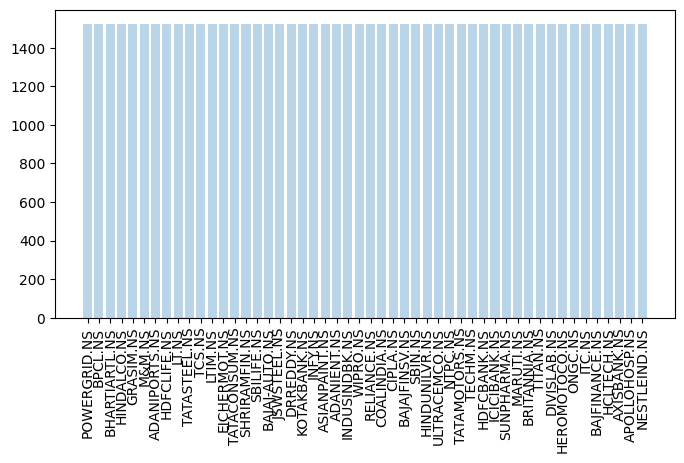

In [289]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [290]:
# create a list for dates with all ticker data points
date_list = list(data[data['tic']=='TCS.NS'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [291]:
data_filtered.head()

,date,tic,close,high,low,open,volume
0,2018-01-01,POWERGRID.NS,113.484406,111.965652,112.612526,111.965652,6388017
1,2018-01-02,POWERGRID.NS,113.512527,112.106277,112.921906,113.203156,4383705
2,2018-01-03,POWERGRID.NS,113.878151,112.837524,113.428154,113.343781,8187397
3,2018-01-04,POWERGRID.NS,114.103149,112.500031,112.696899,113.625031,4204055
4,2018-01-05,POWERGRID.NS,113.653152,112.837524,113.203156,113.231277,4923559


In [292]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [293]:
print(data_points_df)

                0     1
0    POWERGRID.NS  1521
1         BPCL.NS  1521
2   BHARTIARTL.NS  1521
3     HINDALCO.NS  1521
4       GRASIM.NS  1521
5          M&M.NS  1521
6   ADANIPORTS.NS  1521
7     HDFCLIFE.NS  1521
8           LT.NS  1521
9    TATASTEEL.NS  1521
10         TCS.NS  1521
11        LTIM.NS  1521
12   EICHERMOT.NS  1521
13  TATACONSUM.NS  1521
14  SHRIRAMFIN.NS  1521
15     SBILIFE.NS  1521
16  BAJAJ-AUTO.NS  1521
17    JSWSTEEL.NS  1521
18     DRREDDY.NS  1521
19   KOTAKBANK.NS  1521
20        INFY.NS  1521
21  ASIANPAINT.NS  1521
22    ADANIENT.NS  1521
23  INDUSINDBK.NS  1521
24       WIPRO.NS  1521
25    RELIANCE.NS  1521
26   COALINDIA.NS  1521
27       CIPLA.NS  1521
28  BAJAJFINSV.NS  1521
29        SBIN.NS  1521
30  HINDUNILVR.NS  1521
31  ULTRACEMCO.NS  1521
32        NTPC.NS  1521
33  TATAMOTORS.NS  1521
34       TECHM.NS  1521
35    HDFCBANK.NS  1521
36   ICICIBANK.NS  1521
37   SUNPHARMA.NS  1521
38      MARUTI.NS  1521
39   BRITANNIA.NS  1521
40       TITAN.N

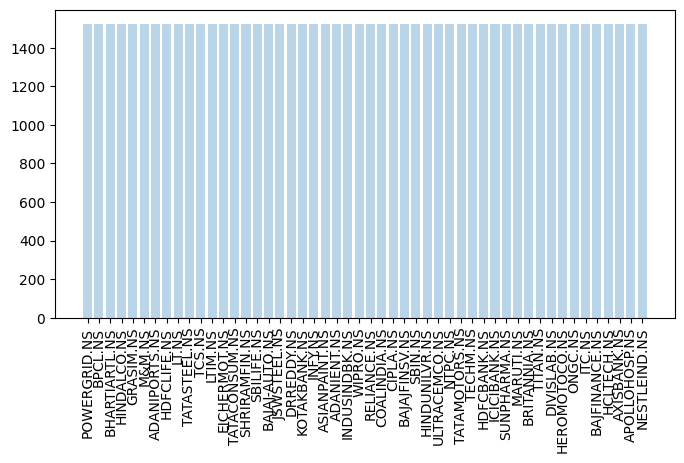

In [294]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [295]:
data_filtered.head()

,date,tic,close,high,low,open,volume
0,2018-01-01,POWERGRID.NS,113.484406,111.965652,112.612526,111.965652,6388017
1,2018-01-02,POWERGRID.NS,113.512527,112.106277,112.921906,113.203156,4383705
2,2018-01-03,POWERGRID.NS,113.878151,112.837524,113.428154,113.343781,8187397
3,2018-01-04,POWERGRID.NS,114.103149,112.500031,112.696899,113.625031,4204055
4,2018-01-05,POWERGRID.NS,113.653152,112.837524,113.203156,113.231277,4923559


### 2.5 Save the Data to csv

In [296]:
data_filtered.to_csv('datasets/data.csv', index=False)

### 2.6 Create a Dataset for the Close Prices

In [297]:
# read the data from the saved csv file
df_prices = pd.read_csv('./datasets/data.csv')

In [298]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [299]:
len(tic_list)

50

In [300]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [301]:
df_close.head()

,date,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
0,2018-01-01,2387.000000,569.799988,70.064255,3810.000000,317.799988,399.799988,1165.166992,271.700012,3345.050049,...,484.966522,790.159973,1216.000000,1760.000000,522.250000,195.699997,585.400024,113.484406,1655.949951,530.875000
1,2018-01-02,2371.125000,568.599976,69.668869,3784.350098,314.950012,398.000000,1149.529175,268.000000,3348.000000,...,480.279999,792.304993,1212.000000,1739.699951,521.000000,197.500000,582.000000,113.512527,1647.000000,522.900024
2,2018-01-03,2354.975098,565.450012,70.264328,3764.399902,315.149994,398.299988,1144.798096,272.250000,3310.199951,...,473.610687,793.500000,1203.949951,1738.349976,515.799988,197.399994,578.950012,113.878151,1650.000000,517.979980
3,2018-01-04,2344.449951,565.000000,72.736679,3759.949951,313.500000,401.950012,1170.844482,281.899994,3274.250000,...,475.142822,790.219971,1188.449951,1758.250000,510.500000,200.000000,583.950012,114.103149,1652.500000,513.500000
4,2018-01-05,2339.750000,566.000000,74.018112,3758.699951,315.850006,412.000000,1214.172241,289.899994,3294.000000,...,488.932068,788.400024,1199.000000,1821.000000,513.200012,200.949997,587.349976,113.653152,1703.000000,514.494995


In [302]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
BRITANNIA.NS,1521.0,3593.591138,694.560606,2310.250000,3095.000000,3518.000000,3900.000000,5386.049805
AXISBANK.NS,1521.0,727.522323,169.490767,337.500000,622.500000,735.000000,809.900024,1151.849976
TATASTEEL.NS,1521.0,82.848506,36.558740,26.795000,49.730000,72.736679,116.269997,153.449997
HEROMOTOCO.NS,1521.0,2922.975437,494.633584,1623.000000,2613.800049,2831.699951,3139.600098,4949.049805
TATACONSUM.NS,1521.0,564.366536,265.089944,186.000000,281.250000,612.400024,782.900024,1190.949951
HDFCLIFE.NS,1521.0,566.417818,98.611536,349.750000,496.750000,578.000000,645.900024,775.650024
GRASIM.NS,1521.0,1266.606398,461.540912,456.086517,830.896179,1238.973633,1696.753296,2244.000000
JSWSTEEL.NS,1521.0,494.204669,221.445966,145.949997,289.899994,412.350006,704.849976,895.750000
BAJAJ-AUTO.NS,1521.0,3620.979219,1012.497308,1989.000000,2932.000000,3372.449951,3898.899902,8650.000000
NTPC.NS,1521.0,144.942549,49.479551,79.599998,116.699997,134.149994,161.649994,348.049988


In [303]:
# Save the Close Price datase

df_close.to_csv('datasets/close_prices.csv', index=False)

In [304]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [305]:
df_close_full_stocks.head()

,date,BRITANNIA.NS,AXISBANK.NS,TATASTEEL.NS,HEROMOTOCO.NS,TATACONSUM.NS,HDFCLIFE.NS,GRASIM.NS,JSWSTEEL.NS,BAJAJ-AUTO.NS,...,BHARTIARTL.NS,NESTLEIND.NS,APOLLOHOSP.NS,BAJFINANCE.NS,INFY.NS,ONGC.NS,SUNPHARMA.NS,POWERGRID.NS,INDUSINDBK.NS,BAJAJFINSV.NS
0,2018-01-01,2387.000000,569.799988,70.064255,3810.000000,317.799988,399.799988,1165.166992,271.700012,3345.050049,...,484.966522,790.159973,1216.000000,1760.000000,522.250000,195.699997,585.400024,113.484406,1655.949951,530.875000
1,2018-01-02,2371.125000,568.599976,69.668869,3784.350098,314.950012,398.000000,1149.529175,268.000000,3348.000000,...,480.279999,792.304993,1212.000000,1739.699951,521.000000,197.500000,582.000000,113.512527,1647.000000,522.900024
2,2018-01-03,2354.975098,565.450012,70.264328,3764.399902,315.149994,398.299988,1144.798096,272.250000,3310.199951,...,473.610687,793.500000,1203.949951,1738.349976,515.799988,197.399994,578.950012,113.878151,1650.000000,517.979980
3,2018-01-04,2344.449951,565.000000,72.736679,3759.949951,313.500000,401.950012,1170.844482,281.899994,3274.250000,...,475.142822,790.219971,1188.449951,1758.250000,510.500000,200.000000,583.950012,114.103149,1652.500000,513.500000
4,2018-01-05,2339.750000,566.000000,74.018112,3758.699951,315.850006,412.000000,1214.172241,289.899994,3294.000000,...,488.932068,788.400024,1199.000000,1821.000000,513.200012,200.949997,587.349976,113.653152,1703.000000,514.494995


In [306]:
pip install pickleshare

Note: you may need to restart the kernel to use updated packages.


In [307]:
%store df_close_full_stocks

Stored 'df_close_full_stocks' (DataFrame)


In [308]:
ticker_list = df_close_full_stocks.columns

In [309]:
print(ticker_list)

Index(['date', 'BRITANNIA.NS', 'AXISBANK.NS', 'TATASTEEL.NS', 'HEROMOTOCO.NS',
       'TATACONSUM.NS', 'HDFCLIFE.NS', 'GRASIM.NS', 'JSWSTEEL.NS',
       'BAJAJ-AUTO.NS', 'NTPC.NS', 'SBIN.NS', 'M&M.NS', 'HCLTECH.NS',
       'SHRIRAMFIN.NS', 'ADANIENT.NS', 'DRREDDY.NS', 'ITC.NS', 'LTIM.NS',
       'ADANIPORTS.NS', 'COALINDIA.NS', 'TITAN.NS', 'EICHERMOT.NS',
       'ICICIBANK.NS', 'BPCL.NS', 'SBILIFE.NS', 'HDFCBANK.NS', 'LT.NS',
       'HINDALCO.NS', 'CIPLA.NS', 'DIVISLAB.NS', 'ASIANPAINT.NS',
       'TATAMOTORS.NS', 'TCS.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'TECHM.NS',
       'HINDUNILVR.NS', 'RELIANCE.NS', 'WIPRO.NS', 'ULTRACEMCO.NS',
       'BHARTIARTL.NS', 'NESTLEIND.NS', 'APOLLOHOSP.NS', 'BAJFINANCE.NS',
       'INFY.NS', 'ONGC.NS', 'SUNPHARMA.NS', 'POWERGRID.NS', 'INDUSINDBK.NS',
       'BAJAJFINSV.NS'],
      dtype='object')
